#Market Basket Analysis


Analysis of historical customer data can highlight if a certain combination of products purchased makes an additional purchase more likely. This is called market basket analysis (also called as MBA). It is a widely used technique to identify the best possible mix of frequently bought products or services. This is also called product association analysis. The set of items a customer buys is referred to as an itemset, and market basket analysis seeks to find relationships between purchases. Market Basket Analysis creates If-Then scenario rules, for example, if item A is purchased then item B is likely to be purchased. The rules are probabilistic in nature or, in other words, they are derived from the frequencies of co-occurrence in the observations. Market Basket analysis is particularly useful for physical retail stores as it can help in planning floor space and product placement amongst many other benefits.

This project covers:
Association rules, Parameters of association rules, Apriori algorithm, Fpgrowth algorithm, Exploratory Data Analysis
Univariate & Bivariate analysis, Identifying top selling products & departments, Creating baskets for analysis, Feature engineering, One hot encoding, Difference between apriori and fpgrowth algorithm, Support, lift, confidence in relation to association rules, Comparing time taken to run apriori and fpgrowth algorithms.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Others/Marketing, Retail & Customer Analytics/Market Basket')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import squarify
#import gapminder as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder



import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

**About Foodmart**

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

**Importing Libraries**

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Data Ingestion

**Loading the Datasets**

In [4]:
# Loading the customer Dataset
customer=pd.read_csv("customer.csv")
customer.head(3)

,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2


In [5]:
#Loading departments Dataset
product_class = pd.read_csv('product_class.csv')
product_class.head(3)

,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food


In [6]:
#Loading the Products Dataset
product=pd.read_csv('product.csv')
product.head(3)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77


In [7]:
# Loading the region Dataset
region = pd.read_csv('region.csv')
region.head(3)


,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,None,None,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118


In [8]:
# Loading the stores Dataset
store = pd.read_csv('store.csv')
store.head(3)


,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0


In [9]:
# Loading the Time dataset
time = pd.read_csv('time_by_day.csv')
time.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


In [10]:
# Loading the Sales dataset
df = pd.read_csv('sales.csv')
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


**Merging the Datasets**

In [11]:
#Merging Customer data to sales 
df= df.merge(customer, on='customer_id')
df.head(3)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2


In [12]:
#Merging product data
df = df.merge(product, on='product_id')

In [13]:
#Merging Department data
df = df.merge(product_class, on='product_class_id')
df.head()
df.info()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [14]:
#Merging Store data
df = df.merge(store, on='store_id')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [15]:
# Merging Region
df = df.merge(region, on='region_id')

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 68 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [16]:
df = df.merge(time, on='time_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [17]:
# Copy to new CSV file
df.to_csv('foodmart.csv')

In [18]:
df.shape

(269720, 74)

##EDA


In [143]:
df.describe(include='all')

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,products,departments,transaction_id
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720,269720,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720.000000,269720,269720,269720,269720.0,269720,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,12,3,NaN,8,2,NaN,NaN,5,1633,4,5,2,NaN,NaN,111,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,45,22,3,5,NaN,24,NaN,24,23,10,NaN,3,22,24,24,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,10,21,7,3,NaN,673,7,NaN,NaN,NaN,NaN,1,1,58308
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo,WA,USA,NaN,$30K - $50K,F,NaN,NaN,Partial High School,16/10/93,Bronze,Professional,Y,NaN,NaN,Hermanos,Moms Roasted Chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,NaN,Store 13,NaN,5179 Valley Ave,Salem,WA,NaN,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salem,WA,Los Angeles,North West,USA,NaN,1998-12-07,Thursday,NaN,NaN,NaN,NaN,Productsb,Departments,7633802
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,86855,180823,NaN,88422,136181,NaN,NaN,81536,954,151261,87867,163137,NaN,NaN,8071,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20859,32919,38041,193728,118341,NaN,25865,NaN,25865,25865,86855,NaN,180823,25865,25865,25865,25865,25865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25865,86855,31501,130006,180823,NaN,1377,40685,NaN,NaN,NaN,NaN,269720,269720,28
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,NaN,NaN,NaN,57.723454,NaN,NaN,2.535351,0.816091,NaN,NaN,NaN,NaN,NaN,2.205632,54.382471,NaN,NaN,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,NaN,NaN,NaN,NaN,NaN,39.894947,NaN,12.753730,NaN,NaN,NaN,55555.0,NaN,NaN,NaN,NaN,NaN,NaN,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,NaN,NaN,NaN,NaN,NaN,120.811319,NaN,NaN,1997.678048,6.661100,15.109970,34402.004990,NaN,NaN,NaN
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,NaN,NaN,NaN,29.973844,NaN,NaN,1.490679,1.292423,NaN,NaN,NaN,NaN,NaN,1.111834,30.846176,NaN,NaN,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,NaN,NaN,NaN,NaN,NaN,32.813184,NaN,6.349746,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,NaN,NaN,NaN,NaN,NaN,6.222520,NaN,NaN,0.467226,

**Checking Null values**

In [144]:
df.isnull().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

In [145]:
temp = pd.DataFrame(index = df.columns)
temp['Null_values'] = df.isnull().sum()
temp['data_types'] = df.dtypes
temp['unique_count'] = df.nunique()
temp

,Null_values,data_types,unique_count
product_id,0,int64,1559
time_id,0,int64,673
customer_id,0,int64,8842
store_id,0,int64,24
store_sales,0,float64,1069
store_cost,0,float64,12535
unit_sales,0,int64,6
city,0,object,107
state_province,0,object,12
country,0,object,3


##Univariate Analysis

*Histograms, Frequency plots*

**Customer Preferences - Department**

Text(0.5, 0, 'Department ID')

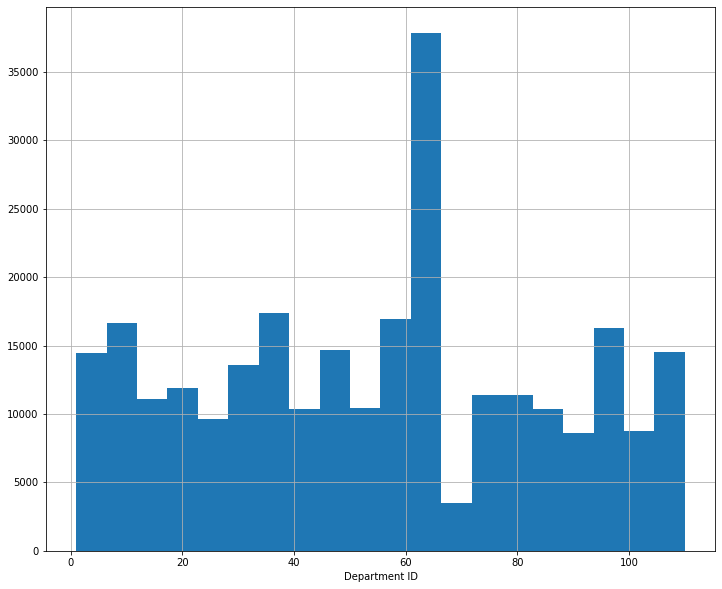

In [146]:
fig = plt.figure(figsize =(12,10))
df['product_class_id'].hist(bins=20)
plt.xlabel('Department ID')
plt.show()

Most departments have sales between 4000-10000, one department showing extraordinary sales of approximately 37000. 

**Customer Preferences - Product**

Text(0.5, 0, 'Product ID')

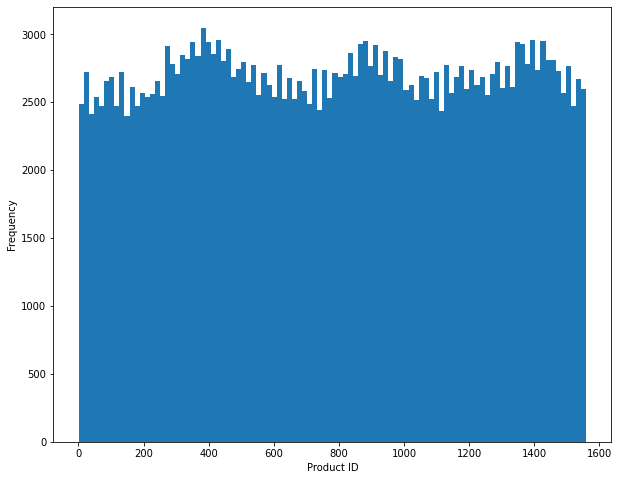

In [147]:
fig=plt.figure(figsize=(10,8))
df['product_id'].plot.hist(bins=100)
plt.xlabel('Product ID')
plt.show()

**Customer Preferences - Unit of Sales**

Text(0.5, 0, 'Unit Sales')

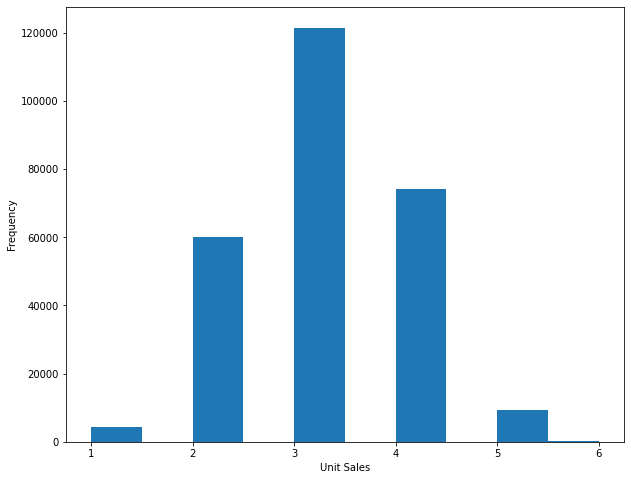

In [148]:
fig = plt.figure(figsize=(10,8))
df['unit_sales'].plot.hist()
plt.xlabel('Unit Sales')
plt.show()

No. of units of products sold. Usually people buy 3 most often, followed by 4, and then 2.
Very few in single quantity and very few in large quantities of 6.


**Customer Preferences - Sales in Years**

Text(0.5, 0, 'year')

([<matplotlib.axis.XTick at 0x7f97aa96cc10>,
 <a list of 4 Text major ticklabel objects>)

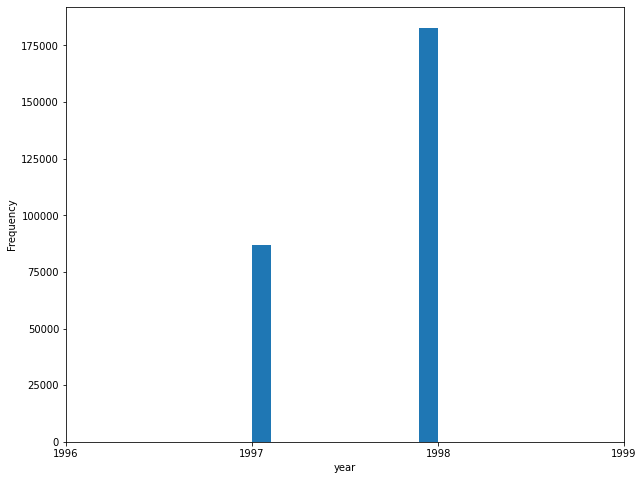

In [149]:
fig = plt.figure(figsize=(10,8))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])
plt.show()

1998, people ordered more, compared to 1997.

**Customer Preferences - Month**

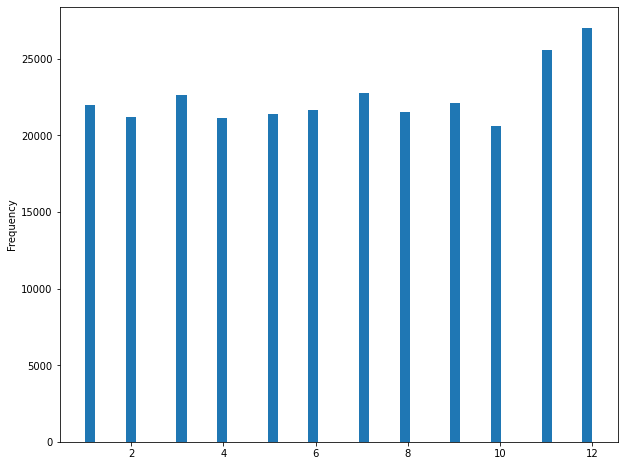

In [150]:
fig = plt.figure(figsize=(10,8))
df['the_month'].plot.hist(bins=50)

**Customer Preferences - Days of the Month**

Text(0.5, 0, 'Day of the Month')

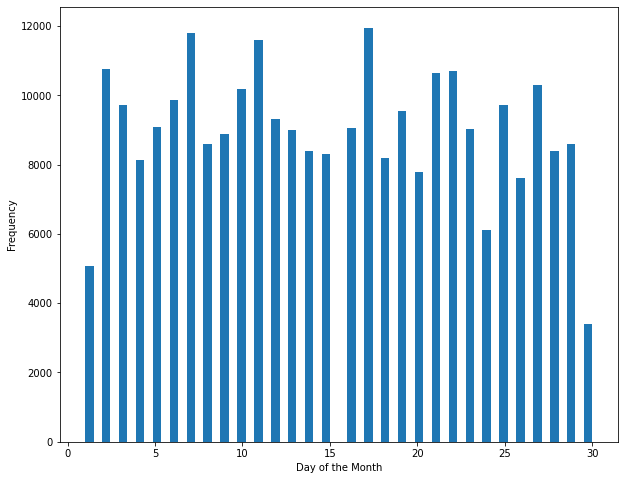

In [151]:
fig = plt.figure(figsize=(10,8))
df['day_of_month'].plot.hist(bins=60)
plt.xlabel('Day of the Month')

Spikes on certian dates on regular intervals, including the 7th when the salary comes in perhaps.


**Customer Preferences - Days of the Week**

Text(0.5, 0, 'Day of the Week')

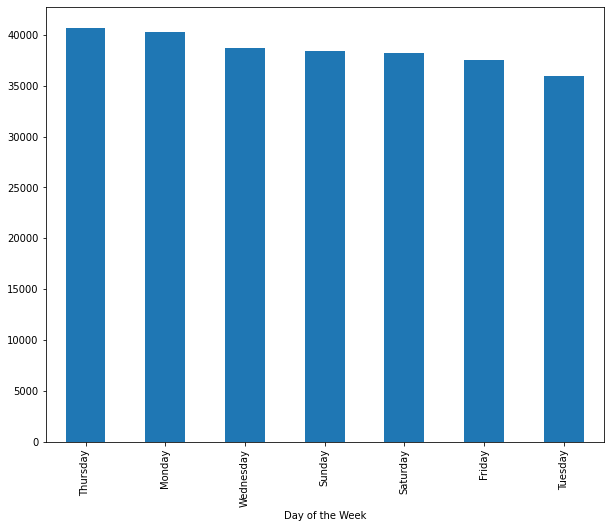

In [152]:
fig = plt.figure(figsize=(10,8))
dow_freq=df.the_day.value_counts()
dow_freq.plot.bar()
plt.xlabel('Day of the Week')

Thursday is the preferred day for shopping.

In [153]:
df.department.value_counts(1)

Produce                0.141039
Snack Foods            0.114871
Household              0.102291
Frozen Foods           0.100260
Baking Goods           0.076275
Canned Foods           0.070777
Dairy                  0.063751
Health and Hygiene     0.061705
Beverages              0.050512
Deli                   0.044973
Baked Goods            0.029479
Snacks                 0.025842
Alcoholic Beverages    0.025697
Starchy Foods          0.019272
Periodicals            0.016009
Eggs                   0.015197
Breakfast Foods        0.012836
Canned Products        0.006596
Meat                   0.006588
Checkout               0.006585
Seafood                0.006258
Carousel               0.003188
Name: department, dtype: float64

Thursday is the preferred day, followed by Monday (not the weekend).

**Customer Preferences - products**

In [154]:
import networkx as nx
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [155]:
df['products']='Productsb'
df.products.value_counts()
df.info()

Productsb    269720
Name: products, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [156]:
products =df.truncate(before =605, after = 615)
products

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,products,departments,transaction_id
605,1551,742,7915,13,4.64,1.7632,4,Corvallis,OR,USA,70,$110K - $130K,F,1,1,Partial College,05/12/92,Bronze,Professional,N,3,4,CDR,CDR Oregano,68866800665,1.16,15.30,13.30,0,0,32,7,16.80,20.10,15.10,Spices,Baking Goods,Baking Goods,Food,Deluxe Supermarket,23,Store 13,13,5179 Valley Ave,Salem,OR,55555,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,27694,18670,5415,3610,1,1,1,1,1,Salem,OR,Salem,North West,USA,122,1998-01-11,Sunday,1998,1,11,34344,Productsb,Departments,7915742
606,903,742,7416,13,7.56,2.9484,3,Corvallis,OR,USA,70,$30K - $50K,F,4,0,High School Degree,19/09/92,Bronze,Skilled Manual,Y,2,27,Fantastic,Fantastic Rye Bread,77181648612,2.52,21.40,18.30,1,1,4,14,16.10,13.10,8.45,Sliced Bread,Bread,Baked Goods,Food,Deluxe Supermarket,23,Store 13,13,5179 Valley Ave,Salem,OR,55555,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,27694,18670,5415,3610,1,1,1,1,1,Salem,OR,Salem,North West,USA,122,1998-01-11,Sunday,1998,1,11,34344,Productsb,Departments,7416742
607,587,742,2916,13,13.08,6.1476,4,Salem,OR,USA,23,$30K - $50K,M,5,0,High School Degree,03/02/91,Bronze,Manual,N,3,27,Colony,Colony Rye Bread,87765130400,3.27,7.71,5.71,0,0,18,6,4.43,20.80,18.20,Sliced Bread,Bread,Baked Goods,Food,Deluxe Supermarket,23,Store 13,13,5179 Valley Ave,Salem,OR,55555,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,27694,18670,5415,3610,1,1,1,1,1,Salem,OR,Salem,North West,USA,122,1998-01-11,Sunday,1998,1,11,34344,Productsb,Departments,2916742
608,1214,742,9929,13,3.96,1.5048,3,Albany,OR,USA,71,$50K - $70K,M,3,3,Bachelors Degree,04/09/92,Golden,Management,Y,4,27,Sphinx,Sphinx Rye Bread,47698195576,1.32,17.80,15.70,0,0,25,8,20.60,16.20,10.60,Sliced Bread,Bread,Baked Goods,Food,Deluxe Supermarket,23,Store 13,13,5179 Valley Ave,Salem,OR,55555,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,27694,18670,5415,3610,1,1,1,1,1,Salem,OR,Salem,North West,USA,122,1998-01-11,Sunday,1998,1,11,34344,Productsb,Departments,9929742
609,382,742,2808,13,4.86,1.6524,3,Lebanon,OR,USA,72,$30K - $50K,M,1,1,High School Degree,26/03/93,Bronze,Manual,Y,1,77,Moms,Moms Roasted Chicken,79627898335,1.62,10.20,8.19,1,1,27,6,12.40,16.30,13.70,Fresh Chicken,Meat,Deli,Food,Deluxe Supermarket,23,Store 13,13,5179 Valley Ave,Salem,OR,55555,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,27694,18670,5415,3610,1,1,1,1,1,Salem,OR,Salem,North West,USA,122,1998-01-11,Sunday,1998,1,11,34344,Productsb,Departments,2808742
610,1009,742,3001,13,8.91,3.4749,3,Woodburn,OR,USA,69,$30K - $50K,F,1,0,High School Degree,27/10/93,Bronze,Manual,N,1,77,American,American Roasted Chicken,81011092066,2.97,12.30,10.30,1,0,33,7,4.08,4.62,16.10,Fresh Chicken,Meat,Deli,Food,Deluxe Supermarket,23,Store 13,13,5179 Valley Ave,Salem,OR,55555,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,27694,18670,5415,3610,1,1,1,1,1,Salem,OR,Salem,North West,USA,122,1998-01-11,Sunday,1998,1,11,34344,Productsb,Departments,3001742
611,32,742,8843,13,8.58,3.7752,3,Corvallis,OR,USA,70,$30

In [157]:
products = nx.from_pandas_edgelist(products, source = 'products', target='product_name', edge_attr=True)
#nx.from_pandas_edgelist(dataframe, source = 'column name that should appear in the middle', target = actual target that will be covered, edge_attr= True means get the attributes from the graph)
products

{'American Roasted Chicken': Text(0.8159896877153546, 0.5658943478990566, 'American Roasted Chicken'),
 'Blue Label Large Canned Shrimp': Text(-0.8163793940529941, -0.5657967274321556, 'Blue Label Large Canned Shrimp'),
 'CDR Oregano': Text(0.3314815011001879, 0.9397074380949794, 'CDR Oregano'),
 'Colony Rye Bread': Text(-1.0, 0.02258311036854618, 'Colony Rye Bread'),
 'Fantastic Rye Bread': Text(-0.7890731273752546, 0.600651447770045, 'Fantastic Rye Bread'),
 'Good Light Beer': Text(0.7954988643930561, -0.6048590751767436, 'Good Light Beer'),
 'Hilltop Deodorant': Text(-0.2862903551019412, 0.9545478585922671, 'Hilltop Deodorant'),
 'Moms Roasted Chicken': Text(-0.33134742544686985, -0.9409556746219138, 'Moms Roasted Chicken'),
 'Productsb': Text(-0.002602368426007226, 3.7327262146060715e-05, 'Productsb'),
 'Sphinx Rye Bread': Text(0.9966840824058879, -0.02136831315343718, 'Sphinx Rye Bread'),
 'Steady Whitening Toothpast': Text(0.28603853478858215, -0.9504417396027895, 'Steady Whiteni

(-1.2096518286526183,
 1.2063359110585061,
 -1.1504656474132704,
 1.154571766402748)

Text(0.5, 1.0, 'Top 15 Product choices')

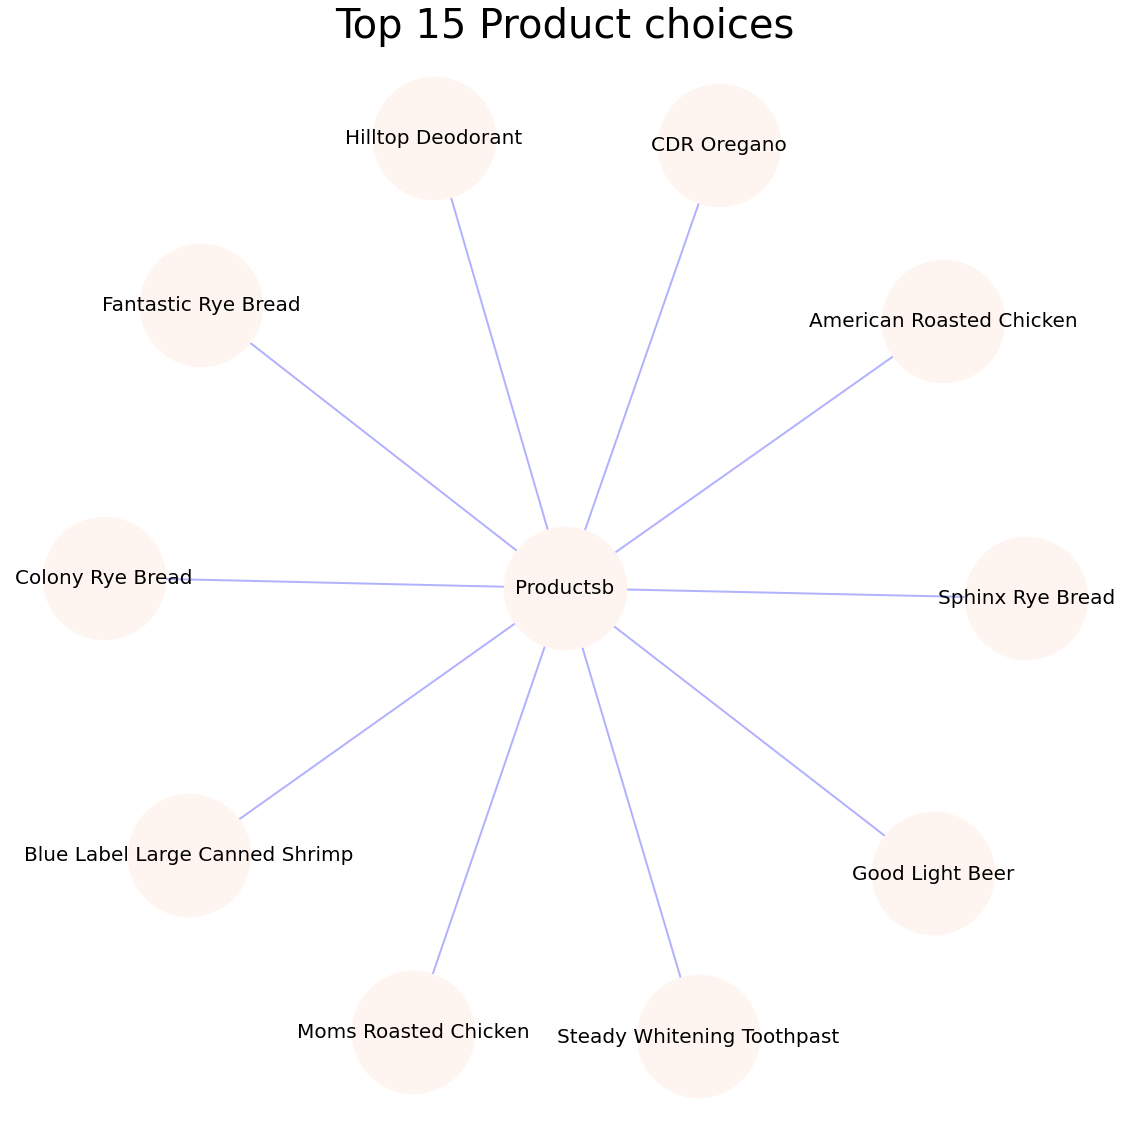

In [158]:
plt.rcParams['figure.figsize']=20,20
pos=nx.spring_layout(products)
color = plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos, node_size=15000, node_color=color)
nx.draw_networkx_edges(products, pos, width = 2, alpha = 0.3, edge_color = 'blue')
nx.draw_networkx_labels(products, pos, font_size = 20)

plt.axis('off')
plt.grid()
plt.title('Top 15 Product choices', fontsize=40)
plt.show()

**Customer Preferences - departments**

In [159]:
df.department.value_counts(1)

Produce                0.141039
Snack Foods            0.114871
Household              0.102291
Frozen Foods           0.100260
Baking Goods           0.076275
Canned Foods           0.070777
Dairy                  0.063751
Health and Hygiene     0.061705
Beverages              0.050512
Deli                   0.044973
Baked Goods            0.029479
Snacks                 0.025842
Alcoholic Beverages    0.025697
Starchy Foods          0.019272
Periodicals            0.016009
Eggs                   0.015197
Breakfast Foods        0.012836
Canned Products        0.006596
Meat                   0.006588
Checkout               0.006585
Seafood                0.006258
Carousel               0.003188
Name: department, dtype: float64

In [160]:
df['departments'] = 'Departments'
departments = df.truncate(before =150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_key=True)

{'Beverages': Text(0.7887178054017882, 0.5505562425431682, 'Beverages'),
 'Canned Foods': Text(0.5349362884686365, -0.7790683616819302, 'Canned Foods'),
 'Canned Products': Text(-0.4253796353501186, -0.888727882344747, 'Canned Products'),
 'Dairy': Text(-0.7990972750193047, -0.5460206495253823, 'Dairy'),
 'Deli': Text(-0.9810617072598824, -0.07246353795405158, 'Deli'),
 'Departments': Text(-0.002004577868191561, 0.0013672601506428048, 'Departments'),
 'Eggs': Text(0.42595536520837673, 0.9304752009247547, 'Eggs'),
 'Frozen Foods': Text(0.972447104803109, 0.08158778288670403, 'Frozen Foods'),
 'Health and Hygiene': Text(0.8953567566176811, -0.4273162000867873, 'Health and Hygiene'),
 'Household': Text(-0.8644132353518917, 0.42392169369855504, 'Household'),
 'Periodicals': Text(-0.5604574558213126, 0.8489709206569275, 'Periodicals'),
 'Produce': Text(0.08108798697626303, -0.9999999999999999, 'Produce'),
 'Snack Foods': Text(-0.06608742080515215, 0.8767175307321456, 'Snack Foods')}

(-1.1861801325264965,
 1.1775655300697232,
 -1.2026998960970992,
 1.133175097021854)

Text(0.5, 1.0, 'Top 15 Departments')

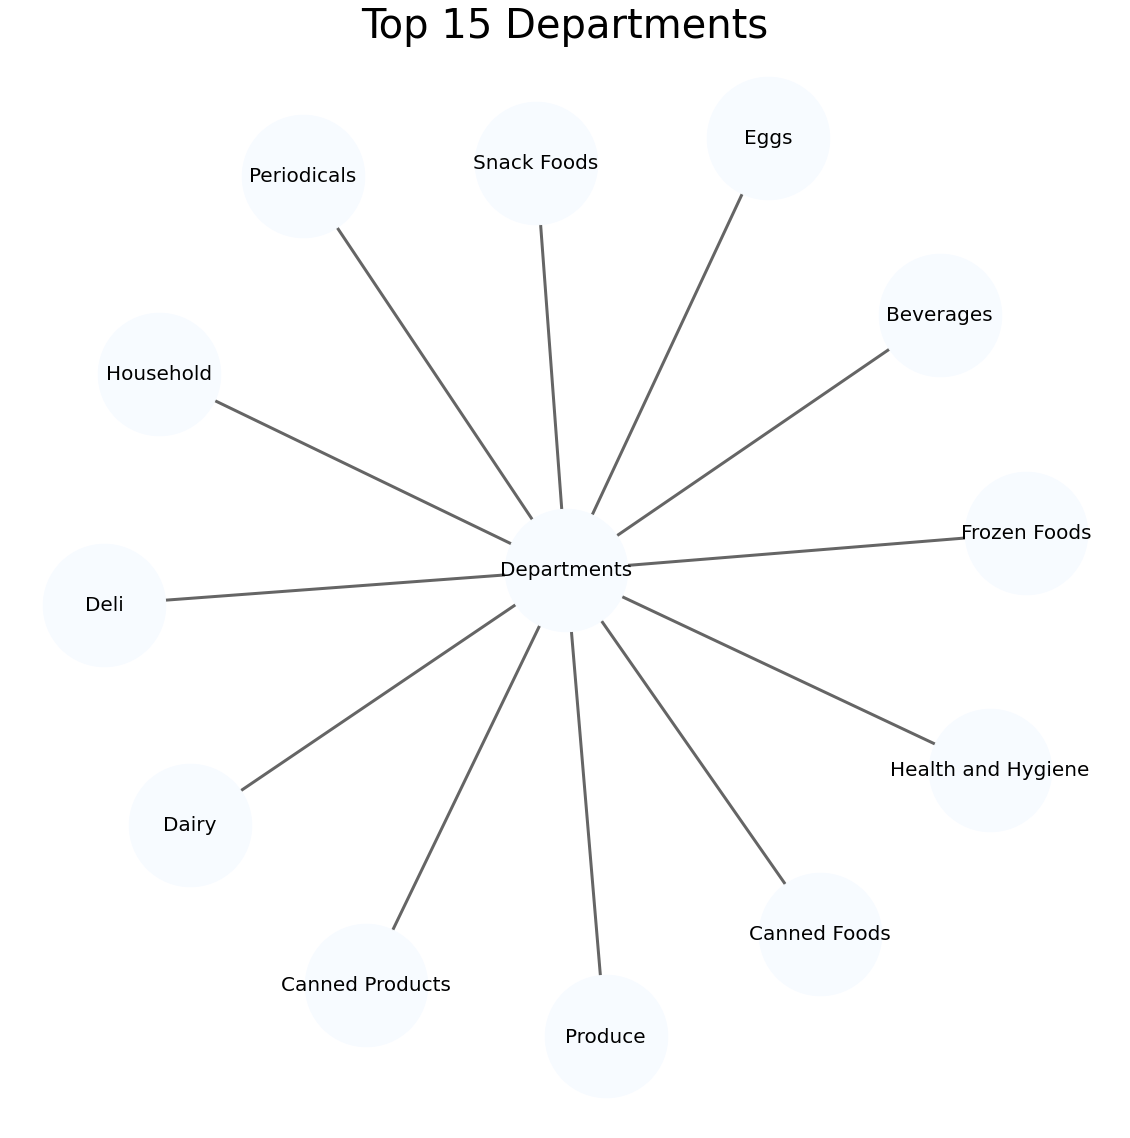

In [161]:
plt.rcParams['figure.figsize']=[20,20]
pos = nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments, pos,node_size=15000, node_color = color)
nx.draw_networkx_edges(departments, pos, width =3, alpha =0.6, edge_color='black')
nx.draw_networkx_labels(departments, pos, font_size=20)

plt.axis('off')
plt.grid()
plt.title('Top 15 Departments', fontsize=40)
plt.show()

**Top 15 Most ordered product (%)**

In [162]:
o = df['product_name'].value_counts(1)*100
o = o.iloc[:50]
o.to_frame()
#or o = o.head(50).to_frame

,product_name
Moms Roasted Chicken,0.083420
Tell Tale Fresh Lima Beans,0.081195
Steady Whitening Toothpast,0.080825
Hilltop Silky Smooth Hair Conditioner,0.080083
Steady Childrens Cold Remedy,0.079342
Nationeel Dried Apples,0.079342
Sunset Economy Toilet Brush,0.078971
Ebony Mixed Nuts,0.078971
Hilltop Mint Mouthwash,0.078971
Special Wheat Puffs,0.078600


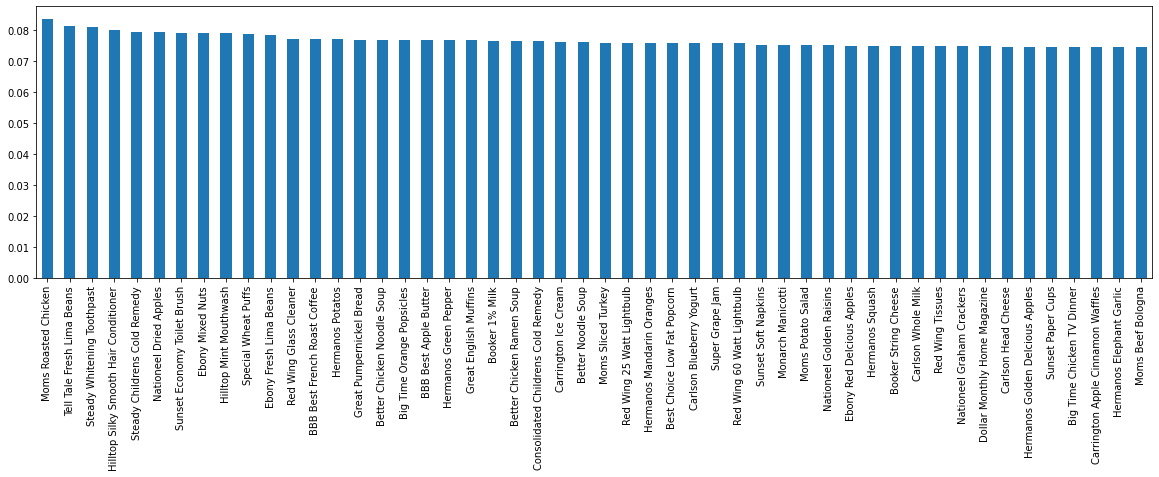

In [163]:
plt.rcParams['figure.figsize']=[20,5]
o.plot.bar()
plt.show()

**Most visited department (%)**

In [164]:
x = df['department'].value_counts(1)*100
x

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

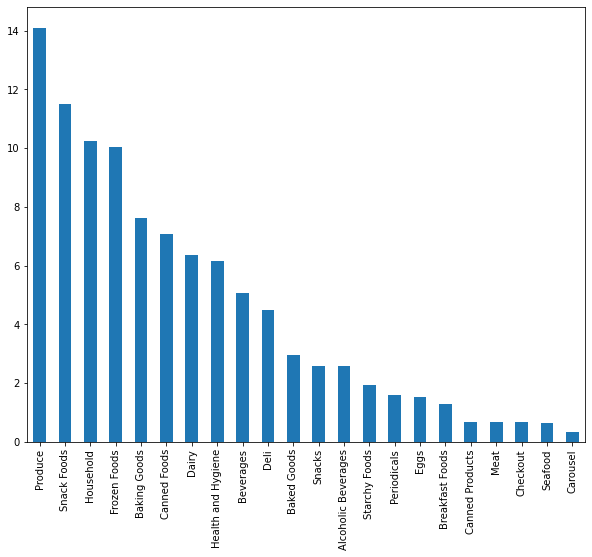

In [165]:
plt.rcParams['figure.figsize'] = [10,8]
x.plot.bar()
plt.show()

Produce is the most popular department, followed by Snack foods.

**Most ordered product / most popular Aisle (%)**

In [166]:
x= df['subcategory'].value_counts(1)*100
x

Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Deli Meats            1.273543
Batteries             1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167136
Ice Crea

Fresh Fruits and vegetables form 13.16% of the subcategories (Aisles).

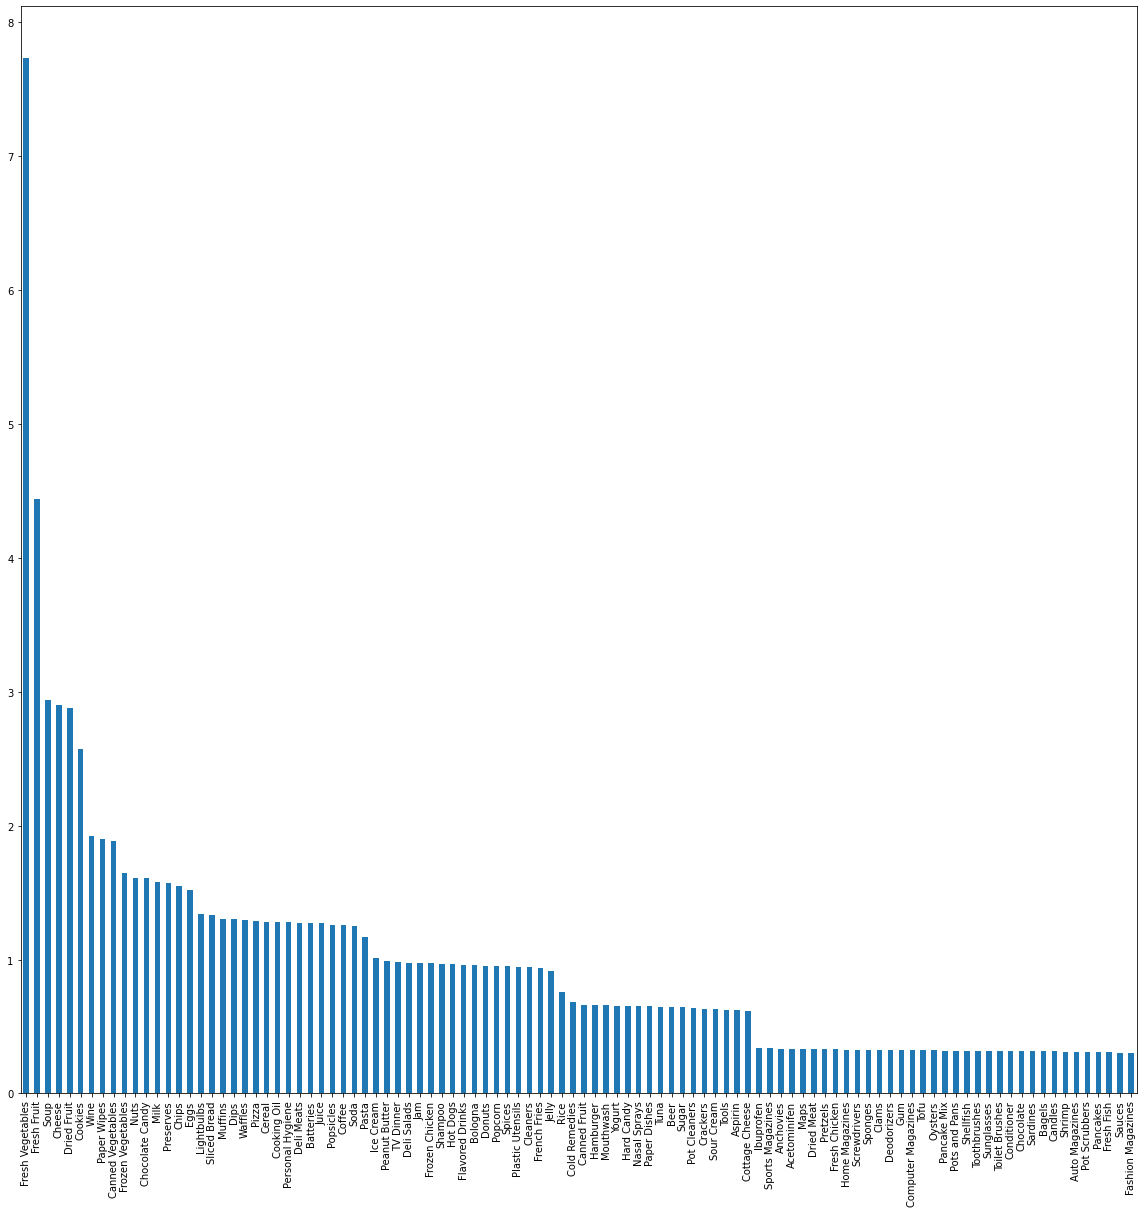

In [167]:
plt.rcParams['figure.figsize']=[20,20]
x.plot.bar()
plt.show()

Even though they seemed closer together, Fresh Vegetables and Fresh Fruit are actually far apart from each other.

*Most ordered product using a Tree Map*

In [168]:
!pip install squarify
import squarify


In [169]:
o.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Sunset Economy Toilet Brush', 'Ebony Mixed Nuts',
       'Hilltop Mint Mouthwash', 'Special Wheat Puffs',
       'Ebony Fresh Lima Beans', 'Red Wing Glass Cleaner',
       'BBB Best French Roast Coffee', 'Hermanos Potatos',
       'Great Pumpernickel Bread', 'Better Chicken Noodle Soup',
       'Big Time Orange Popsicles', 'BBB Best Apple Butter',
       'Hermanos Green Pepper', 'Great English Muffins', 'Booker 1% Milk',
       'Better Chicken Ramen Soup', 'Consolidated Childrens Cold Remedy',
       'Carrington Ice Cream', 'Better Noodle Soup', 'Moms Sliced Turkey',
       'Red Wing 25 Watt Lightbulb', 'Hermanos Mandarin Oranges',
       'Best Choice Low Fat Popcorn', 'Carlson Blueberry Yogurt',
       'Super Grape Jam', 'Red Wing 60 Watt Lightbulb', 'Sunset Soft Napkins',
   

Text(0.5, 1.0, 'Tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

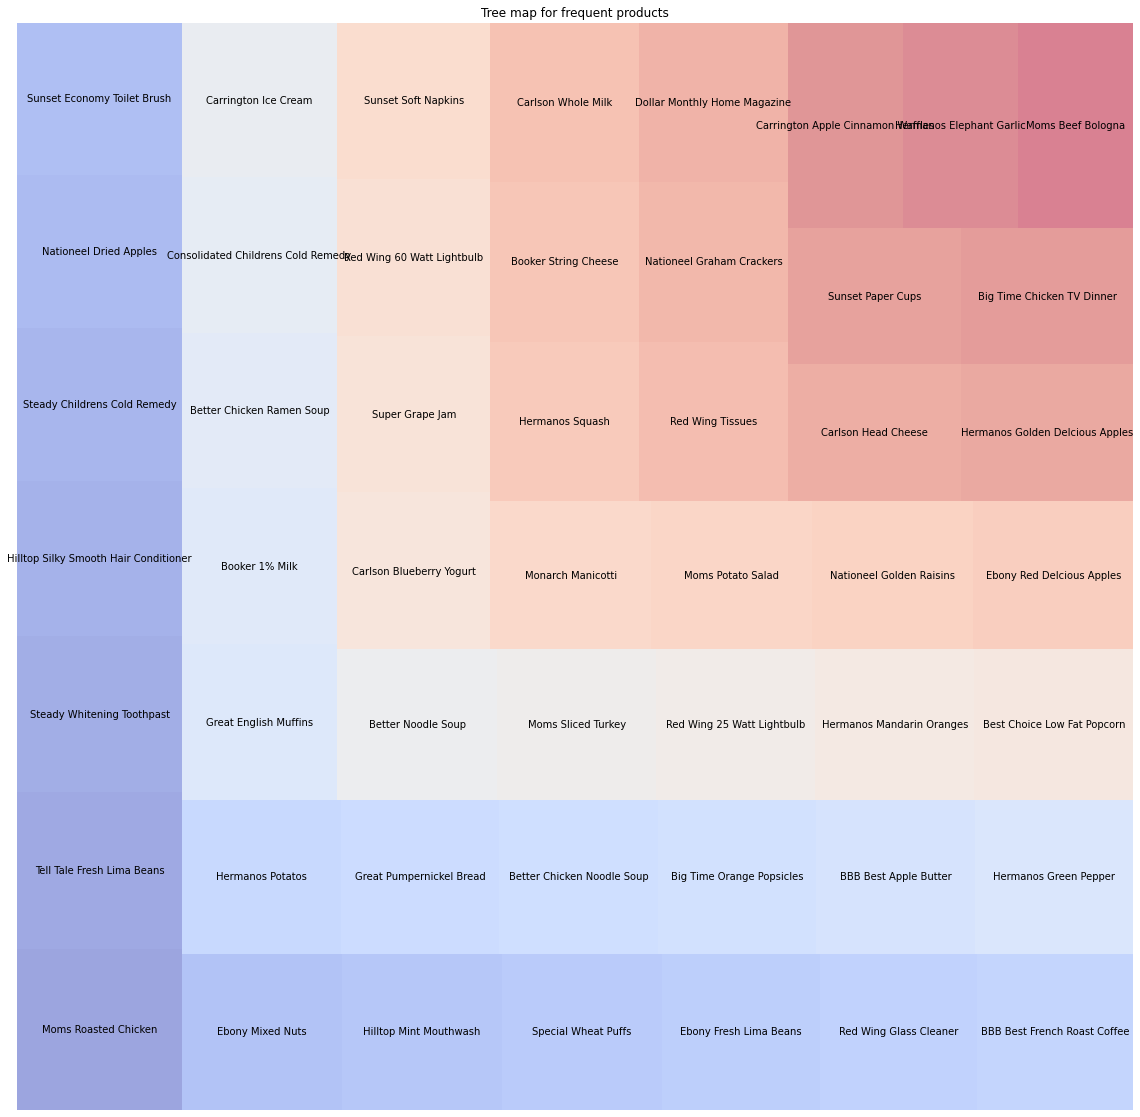

In [170]:
plt.rcParams['figure.figsize'] = (20,20)
color = plt.cm.coolwarm(np.linspace(0,1,50))
squarify.plot(sizes = o.values, label = o.index, color = color, alpha = 0.5)
plt.title('Tree map for frequent products')
plt.axis('off')

The more the cyan the color, the more it is ordered.

###Data Manipulation

In [ ]:
 df.shape

**Drop Duplicates**

In [219]:
df.duplicated().sum()

KeyboardInterrupt: ignored

In [ ]:
#df.drop_duplicates()

##Bivariate Analysis

**No. of units of product bought by each Customer**

In [220]:
# How much as been bought by each customer
customer_bought = df.groupby('customer_id')['unit_sales'].count()
customer_bought.head(4)

customer_id
3    30
5     1
6    16
8    42
Name: unit_sales, dtype: int64

In [221]:
source_data = {}
for i in range(0,10):
  source_data[str(10*i)+'~'+str(10*(i+1))] = len([x for x in list(customer_bought) if x>=i*10 and x<(i+1)*10])

In [222]:
source_data

{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

<BarContainer object of 10 artists>

Text(0.5, 0, 'Unit_sales')

Text(0, 0.5, 'No.of customers')

Text(0.5, 1.0, 'Orders Scatterplot')

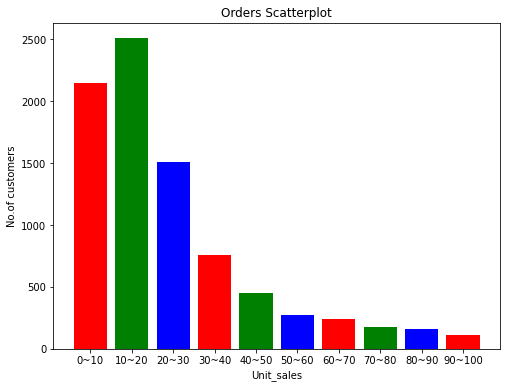

In [223]:
font_size = 10
fig_size = (8,6)
#mpl.rcParams['font_size']=font_size
mpl.rcParams['figure.figsize']=fig_size
bar_width=0.3

x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
plt.bar(x_axis,y_axis, color='rgb')

plt.xlabel('Unit_sales')
plt.ylabel('No.of customers')

plt.title('Orders Scatterplot')
plt.show()

Maximum no. of customers are buying 10-20 units of products.

*Create a Transaction ID for further analysis*

In [224]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)
df.head(5)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,products,departments,transaction_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,6280371
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,4018371
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,6280371
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,4382371


In [225]:
#df.drop('transaction_Id', axis=1, inplace=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

Filtering out Columns

In [227]:
#Separating out transaction_id, product_id, customer_id, product_name
cols = [76,0,2,23]

In [228]:
#making a dataset with chosen columns
order_products=df[df.columns[cols]]
order_products.head(5)

,transaction_id,product_id,customer_id,product_name
0,6280371,337,6280,Better Turkey Noodle Soup
1,4018371,963,4018,Just Right Chicken Noodle Soup
2,6280371,1512,6280,Jardon Spaghetti
3,4018371,181,4018,High Top Lettuce
4,4382371,483,4382,Tell Tale Corn on the Cob


**No. of products brought by customers per transaction**

In [229]:
# Counting no. of product after Grouping by transaction_id
data_user_products1 = order_products.groupby('transaction_id')['product_id'].count()
data_user_products1 = pd.DataFrame(data_user_products1)
data_user_products1.tail(10)

,product_id
transaction_id,
9998704,2
9998719,5
9998747,6
9998820,3
999940,6
9999545,3
9999553,1
9999705,4
9999853,6


This is the aggregated count of the number of different products bought in each transaction.

In [230]:
#Adding the transaction ID as a column with all the index values as values
data_user_products1['transaction_id']= list(data_user_products1.index)
data_user_products1.head(10)

,product_id,transaction_id
transaction_id,,
100001063,4,100001063
10000766,6,10000766
10000768,5,10000768
10000815,1,10000815
10000850,5,10000850
10000863,7,10000863
10000872,9,10000872
10000903,4,10000903
10000908,6,10000908


In [231]:
#Renaming the columns for better explanation
data_user_products1.columns = ['num_of_products','orderid']
data_user_products1.head(10)

,num_of_products,orderid
transaction_id,,
100001063,4,100001063
10000766,6,10000766
10000768,5,10000768
10000815,1,10000815
10000850,5,10000850
10000863,7,10000863
10000872,9,10000872
10000903,4,10000903
10000908,6,10000908


In [232]:
# Adding customer ID (through merging data)
data_user_products2= pd.merge(data_user_products1, df[['transaction_id', 'customer_id']], on='transaction_id', how='inner')

In [233]:
data_user_products2.head(20)

,transaction_id,num_of_products,orderid,customer_id
0,100001063,4,100001063,10000
1,100001063,4,100001063,10000
2,100001063,4,100001063,10000
3,100001063,4,100001063,10000
4,10000766,6,10000766,10000
5,10000766,6,10000766,10000
6,10000766,6,10000766,10000
7,10000766,6,10000766,10000
8,10000766,6,10000766,10000
9,10000766,6,10000766,10000


**Total No. of products brought & Total No. of transactions per customer**

In [234]:
# Find the total number of products bought (sum) and number of tranactions (count) By customer through GroupBy.
data_user_products3 = data_user_products2.groupby('customer_id')['num_of_products'].agg(['sum','count'])
data_user_products3.tail(10)

,sum,count
customer_id,,
10268,40,8
10269,25,5
10271,366,58
10273,602,98
10274,180,32
10275,102,22
10277,142,26
10278,198,28
10280,252,40


**Avg. No. of transactions per customer**

In [235]:
data_user_products3['avg']=data_user_products3['sum']/data_user_products3['count']
data_user_products3=pd.DataFrame(data_user_products3)
data_user_products3 = data_user_products3.rename(columns={'sum': 'num_of_products', 'count': 'num_of_transactions', 'avg': 'avg_num_products'})
data_user_products3.head(10)

,num_of_products,num_of_transactions,avg_num_products
customer_id,,,
3,186,30,6.200000
5,1,1,1.000000
6,72,16,4.500000
8,208,42,4.952381
9,85,13,6.538462
10,135,31,4.354839
11,49,7,7.000000
12,4,2,2.000000
14,42,14,3.000000


On an average, Customer no. 3 buys 6.2 products in one basket.

In [236]:
#data_user_products3=data_user_products3.reset_index

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

**Feature Products per Departments**

In [238]:
# Separate columns -product_id, subcategory, department, product_name into a dataframe called departments
cols = [0, 23, 37, 35]
departments = df[df.columns[cols]]
departments.head(10)

,product_id,product_name,department,subcategory
0,337,Better Turkey Noodle Soup,Canned Foods,Soup
1,963,Just Right Chicken Noodle Soup,Canned Foods,Soup
2,1512,Jardon Spaghetti,Starchy Foods,Pasta
3,181,High Top Lettuce,Produce,Fresh Vegetables
4,483,Tell Tale Corn on the Cob,Produce,Fresh Vegetables
5,1383,Sunset Plastic Spoons,Household,Plastic Utensils
6,1306,Booker Buttermilk,Dairy,Milk
7,77,Blue Medal Small Brown Eggs,Eggs,Eggs
8,533,Fast Chocolate Chip Cookies,Snack Foods,Cookies
9,1196,Musial Spicy Mints,Snacks,Hard Candy


**Top Departments**

In [239]:
temp = ['department']
for i in temp:
  print("Value Counts in", i)
  print(df[i].value_counts(1))

# Could also do something simplier -print(df['department'].value_counts())

Value Counts in department
Produce                0.141039
Snack Foods            0.114871
Household              0.102291
Frozen Foods           0.100260
Baking Goods           0.076275
Canned Foods           0.070777
Dairy                  0.063751
Health and Hygiene     0.061705
Beverages              0.050512
Deli                   0.044973
Baked Goods            0.029479
Snacks                 0.025842
Alcoholic Beverages    0.025697
Starchy Foods          0.019272
Periodicals            0.016009
Eggs                   0.015197
Breakfast Foods        0.012836
Canned Products        0.006596
Meat                   0.006588
Checkout               0.006585
Seafood                0.006258
Carousel               0.003188
Name: department, dtype: float64


45% goods sold belong to Produce, Snack Foods, Household, and Frozen Foods.

**Produce Department**

In [240]:
#Create a dataframe with Produce department data
produce = df.loc[df['department']== 'Produce']
produce.head(10)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,products,departments,transaction_id
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.10,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.60,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,4382371
18,1123,371,7841,7,7.84,2.8224,4,Santa Monica,CA,USA,49,$70K - $90K,M,5,3,Partial High School,01/06/91,Golden,Professional,Y,3,61,Tri-State,Tri-State Potatos,11160125136,1.96,8.17,6.17,0,1,7,6,9.43,16.40,9.74,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,3,Store 7,7,1077 Wharf Drive,Los Angeles,CA,55555,USA,White,477-555-7967,477-555-7961,21/5/1971 0:00,20/10/1981 0:00,23598,14210,5633,3755,0,0,0,0,1,Los Angeles,CA,Los Angeles,South West,USA,116,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,7841371
19,804,371,9507,7,6.63,2.7846,3,Woodland Hills,CA,USA,62,$30K - $50K,M,1,0,High School Degree,21/11/93,Bronze,Skilled Manual,N,3,61,Ebony,Ebony Elephant Garlic,40643578171,2.21,7.48,4.48,0,0,6,7,6.92,16.30,6.44,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,3,Store 7,7,1077 Wharf Drive,Los Angeles,CA,55555,USA,White,477-555-7967,477-555-7961,21/5/1971 0:00,20/10/1981 0:00,23598,14210,5633,3755,0,0,0,0,1,Los Angeles,CA,Los Angeles,South West,USA,116,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,9507371
20,1426,371,9507,7,11.22,4.3758,3,Woodland Hills,CA,USA,62,$30K - $50K,M,1,0,High School Degree,21/11/93,Bronze,Skilled Manual,N,3,61,Hermanos,Hermanos Prepared Salad,11429622769,3.74,13.10,12.10,0,1,21,13,4.99,11.40,10.40,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,3,Store 7,7,1077 Wharf Drive,Los Angeles,CA,55555,USA,White,477-555-7967,477-555-7961,21/5/1971 0:00,20/10/1981 0:00,23598,14210,5633,3755,0,0,0,0,1,Los Angeles,CA,Los Angeles,South West,USA,116,1997-01-05,Sunday,1997,1,5,33973,Productsb,Departments,9507371
21,488,371,5493,7,5.18,1.9166,2,Newport Beach,CA,USA,59,$70K - $90K,F,3,2,Bachelors Degree,06/05/93,Bronze,Professional,N,2,61,Tell Tale,Tell Tale Prepared Salad,15072770714,2.59,9.77,7.77,1,1,20,10,14.40,8.41,16.10,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,3,Store 7,7,1077 Wharf Drive,Los Angeles,CA,55555,USA,White,477-555-7967,477-555-7961,21/5/1971 0:00,20/10/1981 0:00,23598,14210,5633,3755,0,0,0,0,1,Los Angeles,C

**Top 10 products in the Produce Department**

In [241]:
top_produce = produce['product_name'].value_counts().iloc[:10]
top_produce


Tell Tale Fresh Lima Beans         219
Ebony Mixed Nuts                   213
Ebony Fresh Lima Beans             211
Hermanos Potatos                   208
Hermanos Green Pepper              207
Hermanos Mandarin Oranges          204
Hermanos Squash                    202
Ebony Red Delcious Apples          202
Hermanos Golden Delcious Apples    201
Hermanos Tomatos                   201
Name: product_name, dtype: int64

**Top 10 products in the Snack Food Department**

In [242]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_id    269720 non-null  int64 
 1   product_name  269720 non-null  object
 2   department    269720 non-null  object
 3   subcategory   269720 non-null  object
dtypes: int64(1), object(3)
memory usage: 20.3+ MB


In [243]:
snack = df.loc[df['department']== 'Snack Foods']
#snack.head()
snack.product_name.value_counts().iloc[:10]

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Nationeel Avocado Dip          198
Nationeel Grape Fruit Roll     198
Fort West BBQ Potato Chips     198
Fast Beef Jerky                198
Nationeel Lemon Cookies        196
Best Choice Dried Dates        195
Name: product_name, dtype: int64

**Top 10 products in the Household Department**

In [244]:
household = df.loc[df['department']=='Household']
top_hosehold = household.product_name.value_counts().iloc[:10]
top_hosehold.head(10)

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 25 Watt Lightbulb     204
Red Wing 60 Watt Lightbulb     204
Sunset Soft Napkins            203
Red Wing Tissues               202
Sunset Paper Cups              201
Red Wing Counter Cleaner       201
Denny 60 Watt Lightbulb        200
Sunset Paper Plates            199
Name: product_name, dtype: int64

**Top 10 products in the Baking Goods Department**

In [245]:
baking = df.loc[df['department']=='Baking Goods']
top_baking = baking.product_name.value_counts().iloc[:10]
top_baking.head(10)

BBB Best Apple Butter               207
Super Grape Jam                     204
BBB Best Strawberry Jelly           198
Landslide Strawberry Jam            198
Super Strawberry Jelly              197
Super Chunky Peanut Butter          197
Super Creamy Peanut Butter          197
Super Extra Chunky Peanut Butter    195
BBB Best Apple Preserves            192
Landslide Apple Butter              191
Name: product_name, dtype: int64

**Top 10 products in the Canned Foods Department**

In [246]:
canned = df.loc[df['department']== 'Canned Foods']
top_canned = canned.product_name.value_counts().iloc[:10]
top_canned.head(10)

Better Chicken Noodle Soup       207
Better Chicken Ramen Soup        206
Better Noodle Soup               205
Better Fancy Canned Clams        199
Better Canned Tuna in Oil        198
Better Fancy Canned Anchovies    198
Just Right Chicken Ramen Soup    197
Just Right Turkey Noodle Soup    197
Just Right Rice Soup             196
Better Canned Tuna in Water      195
Name: product_name, dtype: int64

**Top 10 products in the Frozen Food Department**

In [247]:
frozen = df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
top_frozen.head(10)

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Carrington Apple Cinnamon Waffles    201
Big Time Chicken TV Dinner           201
Carrington Beef TV Dinner            200
Big Time Pancake Mix                 200
Big Time Frozen Broccoli             200
Big Time Frozen Cheese Pizza         199
Carrington Ice Cream Sandwich        198
Big Time Ice Cream                   197
Name: product_name, dtype: int64

**Top 10 products in the Dairy Department**

In [248]:
dairy = df.loc[df['department']=='Dairy']
top_dairy=dairy['product_name'].value_counts()
top_dairy.head(10)

Booker 1% Milk                   206
Carlson Blueberry Yogurt         204
Carlson Whole Milk               202
Booker String Cheese             202
Carlson Head Cheese              201
Carlson Buttermilk               199
Carlson Low Fat String Cheese    199
Carlson Jack Cheese              198
Carlson Havarti Cheese           197
Carlson 1% Milk                  196
Name: product_name, dtype: int64

**Top 10 products in the Health & Hygiene Department**

In [249]:
hh = df.loc[df['department']=='Health and Hygiene']
top_hh=hh['product_name'].value_counts()
top_hh.head(10)

Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Hilltop Mint Mouthwash                   213
Consolidated Childrens Cold Remedy       206
Steady 200 MG Ibuprofen                  200
Bird Call 200 MG Acetominifen            198
Steady 200 MG Acetominifen               198
Hilltop Extra Moisture Shampoo           197
Hilltop 200 MG Ibuprofen                 197
Name: product_name, dtype: int64

**Top products in the Beverages Department**

In [250]:
bev = df.loc[df['department']=='Beverages']
top_bev=bev['product_name'].value_counts()
top_bev.head()

BBB Best French Roast Coffee    208
Fabulous Apple Juice            201
Fabulous Orange Juice           200
Fabulous Cranberry Juice        199
Skinner Strawberry Drink        198
Name: product_name, dtype: int64

**Top 10 products in the Deli Department**

In [251]:
deli = df.loc[df['department']=='Deli']
top_deli=deli['product_name'].value_counts().iloc[:10]
top_deli.head(10)

Moms Roasted Chicken       225
Moms Sliced Turkey         204
Moms Potato Salad          203
Moms Beef Bologna          201
Moms Foot-Long Hot Dogs    196
Moms Low Fat Cole Slaw     195
American Sliced Ham        195
Moms Chicken Hot Dogs      195
Moms Pimento Loaf          192
Moms Turkey Hot Dogs       190
Name: product_name, dtype: int64

**Top 10 products in the Baked Goods Department**

In [252]:
baked = df.loc[df['department']=='Baked Goods']
top_baked=baked['product_name'].value_counts().iloc[:10]
top_baked.head()

Great Pumpernickel Bread    207
Great English Muffins       207
Fantastic Rye Bread         198
Sphinx Muffins              195
Modell Rye Bread            190
Name: product_name, dtype: int64

**Top 10 products in the Alcoholic Beverages Department**

In [253]:
alcohol = df.loc[df['department']=='Alcoholic Beverages']
top_alcohol=alcohol['product_name'].value_counts().iloc[:10]
top_alcohol.head()

Pearl Chablis Wine            197
Pearl Chardonnay Wine         193
Good Imported Beer            193
Pearl Light Beer              191
Pearl White Zinfandel Wine    189
Name: product_name, dtype: int64

**Top 10 products in the Starchy Foods Department**

In [254]:
starch = df.loc[df['department']=='Starchy Foods']
top_starch=starch['product_name'].value_counts().iloc[:10]
top_starch.head()

Monarch Manicotti        203
Monarch Rice Medly       199
Colossal Manicotti       188
Shady Lake Rice Medly    186
Medalist Thai Rice       186
Name: product_name, dtype: int64

**Top 10 products in the Periodicals Department**

In [255]:
periodicals = df.loc[df['department']=='Periodicals']
top_periodical=periodicals['product_name'].value_counts().iloc[:10]
top_periodical.head()

Dollar Monthly Home Magazine           202
Mighty Good Monthly Sports Magazine    198
Dollar Monthly Sports Magazine         193
Gauss Monthly Computer Magazine        191
Excel Monthly Home Magazine            191
Name: product_name, dtype: int64

**Top 10 products in the Eggs Department**

In [256]:
eggs = df.loc[df['department']=='Eggs']
top_egg=eggs['product_name'].value_counts().iloc[:10]
top_egg.head()

Urban Large Brown Eggs    194
Urban Small Brown Eggs    189
National Large Eggs       187
Urban Egg Substitute      186
Urban Small Eggs          175
Name: product_name, dtype: int64

**Top 10 products in the Breakfast Foods Department**

In [257]:
bfast = df.loc[df['department']=='Breakfast Foods']
top_bfast=bfast['product_name'].value_counts().iloc[:10]
top_bfast.head()

Special Wheat Puffs    212
Best Oatmeal           194
Special Corn Puffs     191
Best Wheat Puffs       185
Best Grits             181
Name: product_name, dtype: int64

**Top 10 products in the Canned Products Department**

In [258]:
canned = df.loc[df['department']=='Canned Products']
top_canned=canned['product_name'].value_counts().iloc[:10]
top_canned.head()

Swell Canned Mixed Fruit       194
Toucan Canned Mixed Fruit      193
Swell Canned Peaches           189
Big City Canned Mixed Fruit    184
Toucan Canned Peaches          182
Name: product_name, dtype: int64

**Top 10 products in the Meat Department**

In [259]:
meat = df.loc[df['department']=='Meat']
top_meat=meat['product_name'].value_counts().iloc[:10]
top_meat.head()

Gerolli Extra Lean Hamburger     197
Footnote Extra Lean Hamburger    188
Footnote Seasoned Hamburger      184
Quick Seasoned Hamburger         178
Quick Extra Lean Hamburger       176
Name: product_name, dtype: int64

**Top 10 products in the Checkout Department**

In [260]:
checkout = df.loc[df['department']=='Checkout']
top_checkout=checkout['product_name'].value_counts().iloc[:10]
top_checkout.head()

Framton City Map                  201
Black Tie City Map                191
Akron Eyeglass Screwdriver        187
James Bay City Map                184
Black Tie Eyeglass Screwdriver    183
Name: product_name, dtype: int64

**Top 10 products in the Seafood Department**

In [261]:
seafood = df.loc[df['department']=='Seafood']
top_seafood=seafood['product_name'].value_counts().iloc[:10]
top_seafood.head()

Curlew Lox         183
Amigo Scallops     181
Kiwi Lox           177
Kiwi Scallops      175
Curlew Scallops    174
Name: product_name, dtype: int64

**Top 10 products in the Carousel Department**

In [262]:
carousel = df.loc[df['department']=='Carousel']
top_carousel=carousel['product_name'].value_counts().iloc[:10]
top_carousel.head(10)

ADJ Rosy Sunglasses         198
Symphony Rosy Sunglasses    173
Prelude Rosy Sunglasses     172
Toretti Rosy Sunglasses     168
King Rosy Sunglasses        149
Name: product_name, dtype: int64

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

##Market Basket Analysis

*Filtering the Columns*

In [94]:
#create a new dataframe with product_id, time_id, customer_id, unit_sales, transaction_id, product_name
col=[0,1,2,6,76,23]
product_name = df[df.columns[col]]
product_name.head()

,product_id,time_id,customer_id,unit_sales,transaction_id,product_name
0,337,371,6280,2,6280371,Better Turkey Noodle Soup
1,963,371,4018,1,4018371,Just Right Chicken Noodle Soup
2,1512,371,6280,3,6280371,Jardon Spaghetti
3,181,371,4018,3,4018371,High Top Lettuce
4,483,371,4382,2,4382371,Tell Tale Corn on the Cob


*Top 100 products bought*

In [95]:
# A GroupBy of product_id and a count of transactions_id. Sort by descending 
ProductCount = pd.DataFrame(product_name.groupby("product_id", as_index = False)['transaction_id'].count())
ProductCount=ProductCount.sort_values(by='transaction_id', ascending = False)
ProductCount.head()

# Select the first 100 rows (and all columns)
topProdFrame= ProductCount.iloc[0:99,:] #ProductCount.head(100)
productId = topProdFrame.loc[:,['product_id']]

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214


*Top 15 products bought*

In [96]:
# A GroupBy of product_name and a count of transactions_id. Sort by descending 
ProductCount1 = pd.DataFrame(product_name.groupby("product_name", as_index = False)['transaction_id'].count())
ProductCount1=ProductCount1.sort_values(by='transaction_id', ascending = False)
#ProductCount1=ProductCount
ProductCount1.head(15)

# Select the first 100 rows (and all columns)
topProdFrame1= pd.DataFrame(ProductCount1.iloc[0:99,0]) #ProductCount.head(100)
#productId = topProdFrame.loc[:,['product_id']]
#topProdFrame1.head(10)

,product_name,transaction_id
1084,Moms Roasted Chicken,225
1428,Tell Tale Fresh Lima Beans,219
1350,Steady Whitening Toothpast,218
897,Hilltop Silky Smooth Hair Conditioner,216
1117,Nationeel Dried Apples,214
1338,Steady Childrens Cold Remedy,214
895,Hilltop Mint Mouthwash,213
499,Ebony Mixed Nuts,213
1363,Sunset Economy Toilet Brush,213
1322,Special Wheat Puffs,212


This is the List of top 15 products by No. of transactions: Product 382 / Moms Roasted Chicken appears in 225 times, product 502 / Tell Tale Fresh Lima Beans appears in 219 times, etc. 

*Dataframe of the Top 100 products*

In [97]:
marketbasketdf = product_name[0:0]
for i in range(0,99):
  pId = productId.iloc[i]['product_id']
  stDf = product_name[product_name.product_id == pId] #Information of the Top 100 products 
  marketbasketdf = marketbasketdf.append(stDf, ignore_index = False)
marketbasketdf.tail()

,product_id,time_id,customer_id,unit_sales,transaction_id,product_name
263583,1373,814,7588,4,7588814,Hilltop 200 MG Ibuprofen
263783,1373,814,7796,5,7796814,Hilltop 200 MG Ibuprofen
264817,1373,785,7158,3,7158785,Hilltop 200 MG Ibuprofen
267512,1373,929,8915,2,8915929,Hilltop 200 MG Ibuprofen
267874,1373,929,7681,3,7681929,Hilltop 200 MG Ibuprofen


*Top 100 products grouped by product name & Transactions to see top associations*

In [98]:
basket = marketbasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
basket.head(10)

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100011011,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

*One Hot Encoding*

In [99]:
def encode(x):
  if x<=0:
    return 0
  if x>0:
    return 1

In [100]:
basket_sets = basket.applymap(encode)
basket_sets.head(30)

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100011011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001793,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [101]:
print(basket_sets.shape)
print(basket_sets.size)

(16929, 99)
1675971


16929 baskets have the top 100 products and the products that are bought with them (One-hot encoded value).

In [102]:
#Taking a sample of 10000 baskets so the apriori algorithm is able to run
basket_sets=basket_sets.head(10000)

###**Apriori Algorithm**


In [1]:
#Import relevant libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

*Frequent items with support 0.01% using Apriori Algorithm*


(Support is frequency of purchase of the item as a % of total purchases)

In [2]:
freq_itemsets = apriori(basket_sets, min_support=0.0001, use_colnames=True)
freq_itemsets

NameError: ignored

Top 100 items that appear in single-item, double-item and multiple item baskets. As expected, the support keeps dropping as the no. of itemsets with the top product increases.

In [ ]:
freq_itemsets.shape

*Association rules using Apriori Algorithm*

In [ ]:
apriori_rules = association_rules(freq_itemsets, metric = 'lift', min_threshold = 1)
apriori_rules

Filtering out co-related products with higher probability

In [ ]:
apriori_rules = apriori_rules[(apriori_rules['lift'] >=50) & (apriori_rules['confidence'] >=0.01)].sort_values(by='lift', ascending=False)

apriori_rules = apriori.to_csv('apriori_rules')

####Recommendation using Apriori

In [ ]:
def recommendations_using_Apriori(item):
  recommend = []
  for i in range(0,2646):
    if item == apriori_rules.iloc[i,0]:
      recommend.append(apriori_rules.iloc[i,1])
  
  return recommend

**10 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommendations = recommendations_using_Apriori(product_name)
print(*recommendations[0:10], sep ="\n")

This is in the decreasing order of likelihood to be seen together. If this is a physical store, this would be appearing together in the aisle. 

If this is a digital store, this would be in the recommendation system.

**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommendations = recommendations_using_Apriori(product_name)
print(*recommendations[0:10], sep ='\n')


**5 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommendations = recommendations_using_Apriori(product_name)
print(*recommendations[0:5], sep ='\n')


**5 Recommendations with Ebony Red Delcious Apples**

In [ ]:
product_name = {'Ebony Red Delcious Apples'}
recommendations = recommendations_using_Apriori(product_name)
print(*recommendations[0:5], sep ='\n')


**5 Recommendations with Ebony Fresh Lima Beans**

In [ ]:
product_name = {'Ebony Fresh Lima Beans'}
recommendations = recommendations_using_Apriori(product_name)
print(*recommendations[0:5], sep ='\n')


**5 Recommendations with Super Grape Jam**

In [ ]:
product_name = {'Super Grape Jam'}
recommendations = recommendations_using_Apriori(product_name)
print(*recommendations[0:10], sep ='\n')


###**Fpgrowth Algorithm**

Before running the Fpgrowth algorithm, we need to stop the runtime, load the codes in the notebook before the Apriori algorithm and them import the Fpgrowth algortithm.

In [105]:
%pip install mlxtend --upgrade

In [108]:
from mlxtend.frequent_patterns import fpgrowth

*Frequent items with support 0.001% using Fpgrowth Algorithm*

In [109]:
freq_items = fpgrowth(basket_sets,min_support=0.0001, use_colnames=True)
freq_items.sort_values(by='support', ascending = False)

*Association Rules using Fpgrowth Algorithm*

In [142]:
fpgrowth_rules = association_rules(freq_items, metric='lift', min_threshold = 1).sort_values(by='lift', ascending=False)
#fpgrowth_rules= fpgrowth_rules.to_csv('fpgrowth_rules')
fpgrowth_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1485,"(Ebony Fresh Lima Beans, Hermanos Golden Delci...","(Big Time Chicken TV Dinner, Tell Tale Fresh L...",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
1940,"(Moms Sliced Turkey, Better Chicken Noodle Soup)","(Landslide Strawberry Jam, Tell Tale Lettuce)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2212,"(Ebony Squash, Great English Muffins)","(Super Grape Jam, Red Wing Tissues, Ebony Red ...",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2210,"(Red Wing Tissues, Ebony Red Delcious Apples)","(Ebony Squash, Great English Muffins, Super Gr...",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2203,"(Ebony Squash, Great English Muffins, Super Gr...","(Red Wing Tissues, Ebony Red Delcious Apples)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2201,"(Super Grape Jam, Red Wing Tissues, Ebony Red ...","(Ebony Squash, Great English Muffins)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2198,"(Ebony Squash, Great English Muffins, Ebony Re...","(Super Grape Jam, Red Wing Tissues)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2197,"(Ebony Squash, Super Grape Jam, Ebony Red Delc...","(Great English Muffins, Red Wing Tissues)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2173,"(Red Wing Tissues, Ebony Red Delcious Apples)","(Great English Muffins, Ebony Squash)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf
2168,"(Great English Muffins, Ebony Squash)","(Red Wing Tissues, Ebony Red Delcious Apples)",0.0001,0.0001,0.0001,1.000000,10000.000000,0.0001,inf


In [126]:
fpgrowth_rules.shape

(2646, 9)

####Recommendation using Fpgrowth

In [130]:
#ml.frequent_patterns.
def recommendations_using_Fpgrowth(item):
  recommend = []
  for i in range (0,2646):
    if item == fpgrowth_rules.iloc[i,0]:
          recommend.append(fpgrowth_rules.iloc[i,1])
  return recommend

In [131]:
product_name = {'Better Chicken Noodle Soup'}
recommendations = recommendations_using_Fpgrowth(product_name)
print(*recommendations[0:10], sep="\n")

frozenset({'Sunset Large Sponge', 'Better Chicken Ramen Soup'})
frozenset({'Landslide Strawberry Jam', 'Tell Tale Lettuce'})
frozenset({'Moms Potato Salad', 'ADJ Rosy Sunglasses'})
frozenset({'Moms Potato Salad', 'Special Wheat Puffs'})
frozenset({'Carlson Blueberry Yogurt', 'Red Wing Plastic Knives'})
frozenset({'Moms Potato Salad', 'Special Wheat Puffs', 'ADJ Rosy Sunglasses'})
frozenset({'Special Wheat Puffs', 'ADJ Rosy Sunglasses'})
frozenset({'Moms Sliced Turkey', 'Landslide Strawberry Jam', 'Tell Tale Lettuce'})
frozenset({'Moms Sliced Turkey', 'Tell Tale Lettuce'})
frozenset({'Fort West BBQ Potato Chips', 'Tell Tale Fresh Lima Beans'})


In [141]:
product_name = {'Moms Potato Salad'}
recommendations = recommendations_using_Fpgrowth(product_name)
print(*recommendations[0:10], sep="\n")

frozenset({'Special Wheat Puffs', 'ADJ Rosy Sunglasses', 'Better Chicken Noodle Soup'})
frozenset({'ADJ Rosy Sunglasses', 'Better Chicken Noodle Soup'})
frozenset({'Special Wheat Puffs', 'ADJ Rosy Sunglasses'})
frozenset({'Just Right Turkey Noodle Soup', 'Denny 60 Watt Lightbulb', 'Better Canned Tuna in Oil'})
frozenset({'Red Wing 60 Watt Lightbulb', 'Hilltop Extra Moisture Shampoo'})
frozenset({'Big Time Frozen Cheese Pizza', 'Fabulous Orange Juice'})
frozenset({'Just Right Turkey Noodle Soup', 'Denny 60 Watt Lightbulb'})
frozenset({'Great Pumpernickel Bread', 'Red Wing Tissues'})
frozenset({'Moms Roasted Chicken', 'Framton City Map'})
frozenset({'Special Wheat Puffs', 'Better Chicken Noodle Soup'})


In [138]:
product_name = {'Moms Sliced Turkey'}
recommendations = recommendations_using_Fpgrowth(product_name)
print(*recommendations[0:15], sep="\n")

frozenset({'Better Chicken Noodle Soup', 'Tell Tale Lettuce'})
frozenset({'Landslide Strawberry Jam', 'Better Chicken Noodle Soup'})
frozenset({'Landslide Strawberry Jam', 'Tell Tale Lettuce'})
frozenset({'Steady Childrens Cold Remedy', 'Hilltop Deodorant'})
frozenset({'Fabulous Orange Juice', 'Ebony Red Delcious Apples'})
frozenset({'Better Chicken Noodle Soup', 'Landslide Strawberry Jam', 'Tell Tale Lettuce'})
frozenset({'Better Noodle Soup', 'Carlson Buttermilk'})
frozenset({'Carlson Blueberry Yogurt', 'Landslide Strawberry Jam'})
frozenset({'Sunset Paper Cups', 'Bird Call 200 MG Acetominifen'})
frozenset({'Landslide Strawberry Jam'})
frozenset({'Hilltop Deodorant'})
frozenset({'Better Noodle Soup'})
frozenset({'Ebony Mixed Nuts'})
frozenset({'Better Chicken Ramen Soup'})
frozenset({'Sunset Paper Cups'})


In [136]:
product_name = {'Ebony Fresh Lima Beans'}
recommendations = recommendations_using_Fpgrowth(product_name)
print(*recommendations[0:15], sep="\n")


frozenset({'Tell Tale Fresh Lima Beans', 'Hermanos Golden Delcious Apples'})
frozenset({'Big Time Chicken TV Dinner', 'Tell Tale Fresh Lima Beans', 'Hermanos Golden Delcious Apples'})
frozenset({'Big Time Chicken TV Dinner', 'Tell Tale Fresh Lima Beans'})
frozenset({'Big Time Chicken TV Dinner', 'Hermanos Golden Delcious Apples'})
frozenset({'Dollar Monthly Home Magazine', 'Carrington Ice Cream'})
frozenset({'Dollar Monthly Home Magazine', 'Consolidated Childrens Cold Remedy'})
frozenset({'Super Strawberry Jelly'})
frozenset({'Dollar Monthly Home Magazine'})
frozenset({'Just Right Chicken Ramen Soup'})
frozenset({'Super Grape Jam'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Great English Muffins'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})


In [140]:
product_name = {'Carrington Ice Cream Sandwich'}
recommendations = recommendations_using_Fpgrowth(product_name)
print(*recommendations[0:15], sep="\n")


##**Apriori vs Fpgrowth Algorithm**

*Calculating Run time for Apriori Algorithm*

In [293]:
import time
L=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in L:
  t1 = time.time()
  apriori(basket_sets,min_support=i, use_colnames=True)
  t2=time.time()
  t.append((t2-t1)*1000)

,support,itemsets
0,0.0112,(ADJ Rosy Sunglasses)
1,0.0117,(BBB Best Apple Butter)
2,0.0116,(BBB Best French Roast Coffee)
3,0.0118,(BBB Best Strawberry Jelly)
4,0.0119,(Best Choice Low Fat Popcorn)
5,0.0113,(Better Canned Tuna in Oil)
6,0.0120,(Better Chicken Noodle Soup)
7,0.0120,(Better Chicken Ramen Soup)
8,0.0122,(Better Fancy Canned Anchovies)
9,0.0114,(Better Fancy Canned Clams)


,support,itemsets


,support,itemsets


,support,itemsets


,support,itemsets


*Calculating Run time for Fpgrowth Algorithm*

In [294]:
L=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in L:
  t1 = time.time()
  fpgrowth(basket_sets,min_support=i, use_colnames=True)
  t2=time.time()
  f.append((t2-t1)*1000)

,support,itemsets
0,0.0120,(Moms Potato Salad)
1,0.0136,(Great English Muffins)
2,0.0131,(Carlson Low Fat String Cheese)
3,0.0119,(Sunset Large Sponge)
4,0.0113,(Fabulous Apple Juice)
5,0.0116,(BBB Best French Roast Coffee)
6,0.0124,(Special Wheat Puffs)
7,0.0120,(Better Chicken Noodle Soup)
8,0.0112,(ADJ Rosy Sunglasses)
9,0.0121,(Big Time Orange Popsicles)


,support,itemsets


,support,itemsets


,support,itemsets


,support,itemsets


Text(0.5, 0, 'Min support threshold')

Text(0, 0.5, 'Run Time in ms')

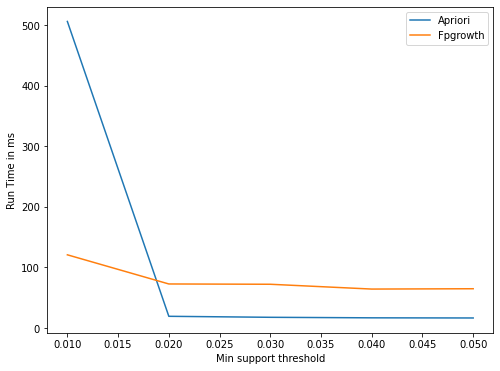

In [296]:
sns.lineplot(x=L, y= t, label = 'Apriori')
sns.lineplot(x=L, y = f, label ='Fpgrowth')
plt.xlabel("Min support threshold")
plt.ylabel("Run Time in ms")

On lower support values, Apriori takes a lot more time than Fpgrowth. Low support means, a lower threshold, leading to many products making it in the threshold which leads to extensive use of the memory. This is just with the top 100 products. After 0.02 support threshold, Apriori is faster than Fpgrowth.